In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
from matplotlib.colors import hsv_to_rgb

In [48]:
pd.set_option('display.max_rows',6252)
df=pd.read_csv('city_populations.csv', usecols=['name','group','year','value'])
df

name          group  year         value
0                 Agra          India  1575    200.000000
1                 Agra          India  1576    212.000000
2                 Agra          India  1577    224.000000
3                 Agra          India  1578    236.000000
4                 Agra          India  1579    248.000000
5                 Agra          India  1580    260.000000
6                 Agra          India  1581    272.000000
7                 Agra          India  1582    284.000000
8                 Agra          India  1583    296.000000
9                 Agra          India  1584    308.000000
10                Agra          India  1585    320.000000
11                Agra          India  1586    332.000000
12                Agra          India  1587    344.000000
13                Agra          India  1588    356.000000
14                Agra          India  1589    368.000000
15                Agra          India  1590    380.000000
16                Agra          India  1591    392.000000
17                Agra          India  1592    404.000000
18                Agra          India  1593    416.000000
19                Agra          India  1594    428.000000
20                Agra          India  1595    440.000000
21                Agra          India  1596    452.000000
22                Agra          India  1597    464.000000
23                Agra          India  1598    476.000000
24                Agra          India  1599    488.000000
25                Agra          India  1600    500.000000
26                Agra          India  1601    500.000000
27                Agra          India  1602    500.000000
28                Agra          India  1603    500.000000
29                Agra          India  1604    500.000000
30                Agra          India  1605    500.000000
31                Agra          India  1606    500.000000
32                Agra          India  1607    500.000000
33                Agra          India  1608    500.000000
34                Agra          India  1609    500.000000
35                Agra          India  1610    500.000000
36                Agra          India  1611    496.428571
37                Agra          India  1612    492.857143
38                Agra          India  1613    489.285714
39                Agra          India  1614    485.714286
40                Agra          India  1615    482.142857
41                Agra          India  1616    478.571429
42                Agra          India  1617    475.000000
43                Agra          India  1618    471.428571
44                Agra          India  1619    467.857143
45                Agra          India  1620    464.285714
46                Agra          India  1621    460.714286
47                Agra          India  1622    457.142857
48                Agra          India  1623    453.571429
49                Agra          India  1624    450.000000
50                Agra          India  1625    446.428571
51                Agra          India  1626    442.857143
52                Agra          India  1627    439.285714
53                Agra          India  1628    435.714286
54                Agra          India  1629    432.142857
55                Agra          India  1630    428.571429
56                Agra          India  1631    425.000000
57                Agra          India  1632    421.428571
58                Agra          India  1633    417.857143
59                Agra          India  1634    414.285714
60                Agra          India  1635    410.714286
61                Agra          India  1636    407.142857
62                Agra          India  1637    403.571429
63                Agra          India  1638    400.000000
64                Agra          India  1639    376.666667
65                Agra          India  1640    353.333333
66                Agra          India  1641    330.000000
67                Agra          India  1642    306.666667
68              

In [3]:
# colors = dict(zip(
#     ['India', 'Europe', 'Asia', 'Latin America',
#      'Middle East', 'North America', 'Africa'],
#     ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
#      '#aafbff', '#f7bb5f', '#eafb50']
# ))
# group_lk = df.set_index('name')['group'].to_dict()

In [40]:
t=df['group'].unique()
col = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1]) for i in range(0,len(t))]
colors=dict(zip(t,col))
group_lk = df.set_index('name')['group'].to_dict()

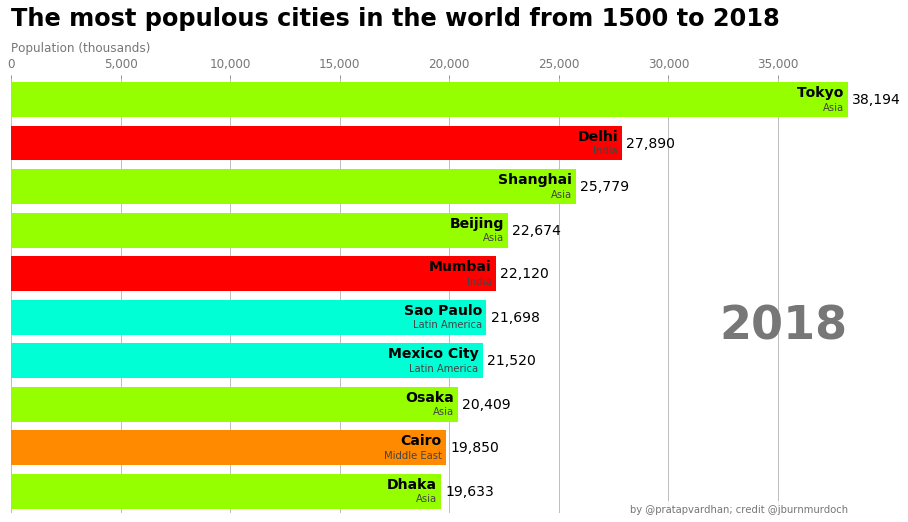

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

# Animate Race
To animate the race, we will use FuncAnimation from matplotlib.animation. FuncAnimation makes an animation by repeatedly calling a function (that draws on canvas). In our case, that function will be draw_barchart. We also use frames, this argument accepts on what values you want to run draw_barchart – we’ll run from year 1968 to 2018.

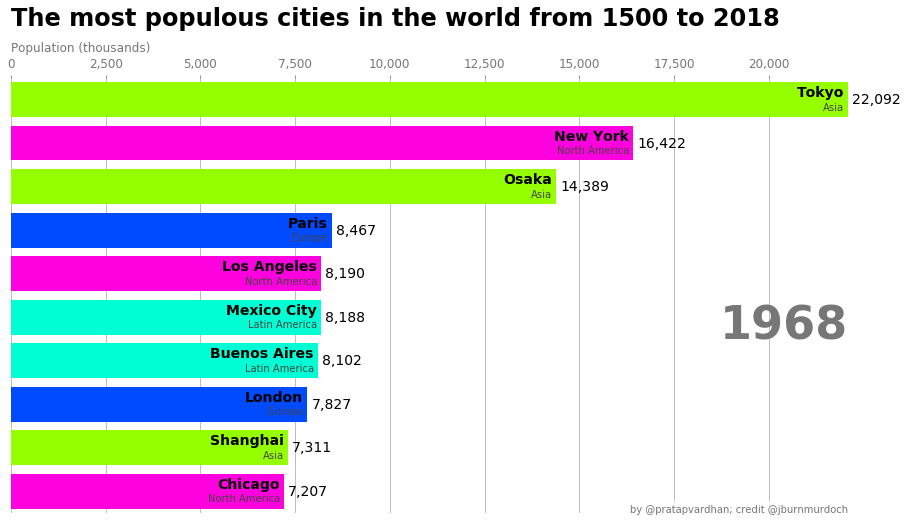

In [43]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

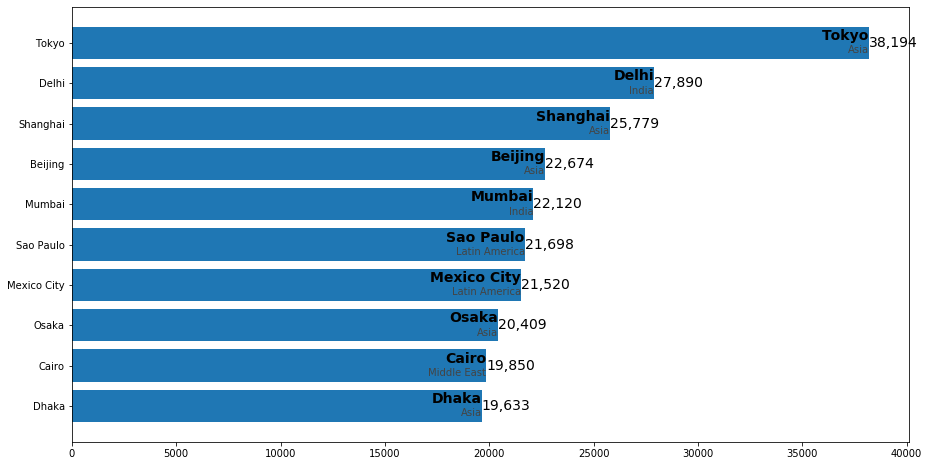

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'])
#     dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
#     ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
#     ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
#     ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#     ax.xaxis.set_ticks_position('top')
#     ax.tick_params(axis='x', colors='#777777', labelsize=12)
#     ax.set_yticks([])
#     ax.margins(0, 0.01)
#     ax.grid(which='major', axis='x', linestyle='-')
#     ax.set_axisbelow(True)
#     ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
#             transform=ax.transAxes, size=24, weight=600, ha='left')
#     ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
#             color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
#     plt.box(False)
    
draw_barchart(2018)

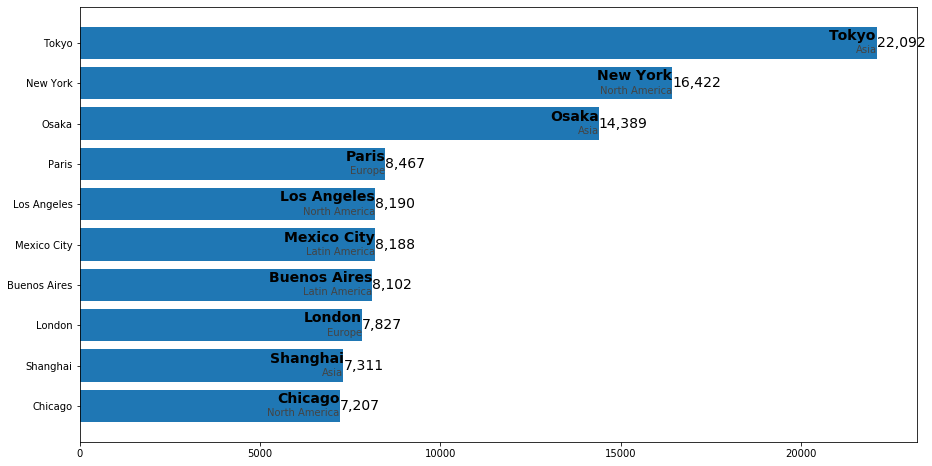

In [27]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()